![Shark attacks, a project by Roberto Henríquez Perozo. Data Analytics Bootcamp at IronHack](INPUT/shark-attacks.png)

<center>You can clone the repo of this project at <br>https://github.com/rihp/shark-attacks </center>

 <center><h1> PART II <br> Data analysis and hypothesis formulation</h1> </center>
 
 

In [1]:
# You should have an exported.csv file. 
# We generated it while following along the 'PART I' of this project. 
# Do you have it?
# If you don't, you can download the 'PART I' from: 
# https://github.com/rihp/shark-attacks

In [2]:
# Importing modules
import pandas as pd
import numpy as np
import random
import matplotlib

#pd.compat.PY3 = True
%matplotlib inline

In [3]:
# Loading the cleaned dataset as a dataframe
df = pd.read_csv('OUTPUT/exported.csv', encoding='latin-1')
df.head(3)

,Unnamed: 0,CaseNum,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal,Species,Source,href,Species2,Activity2
0,0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,White shark,Paddling
1,1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,Minor injury to left thigh,N,Invalid,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Standing
2,2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,Injury to left lower leg from surfboard skeg,N,Invalid,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Surfing


In [4]:
# Review the columns of the exported dataset
df = df.drop(columns='Unnamed: 0')
df.columns

Index([u'CaseNum', u'Date', u'Year', u'Type', u'Country', u'Area', u'Location',
       u'Activity', u'Sex', u'Injury', u'Fatal', u'Species', u'Source',
       u'href', u'Species2', u'Activity2'],
      dtype='object')

## 🎣️ Step 7 - BASIC GRAPHS

### 🦈️ Fatalities

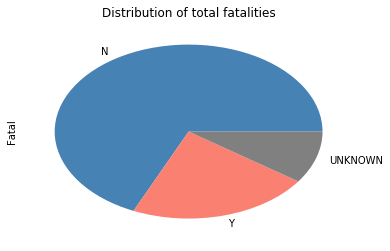

In [5]:
# Total Fatalities include unknown values

s_fatal = df.Fatal.value_counts()
s_fatal.plot.pie(title='Distribution of total fatalities', colors=('steelblue', 'salmon', 'grey'))

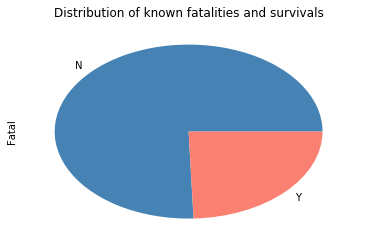

In [6]:
# Taking out the unkown values

fatals_filt = df[~df.Fatal.isin(['UNKNOWN'])]
fatals_filt.Fatal.value_counts().plot.pie(title='Distribution of known fatalities and survivals',
                                         colors=('steelblue', 'salmon'))

### 🦈️ PROVOKED and UNPROVOKED Attacks (`Type` Column)

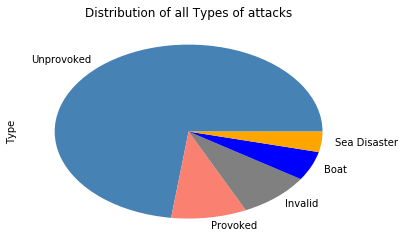

In [7]:
# Types of attack
s_types = df.Type.value_counts()
s_types.plot.pie(title='Distribution of all Types of attacks',
                colors=('steelblue', 'salmon', 'grey', 'blue', 'orange'))

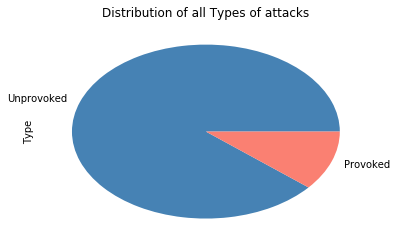

In [8]:
# Types of attack
types_filt = df[df.Type.isin(['Provoked', 'Unprovoked'])]
types_filt.Type.value_counts().plot.pie(title='Distribution of all Types of attacks',
                                       colors=('steelblue', 'salmon'))

## 🦈️ Shark Species - All properly documented incidents

In [9]:
species_filt = df[
    ~df.Species2.isin(['INVALID ENTRY',
                               'OTHER / NOT KNOWN',
                               'HOAX',
                              'DROWNED',
                              'STINGRAY'])]

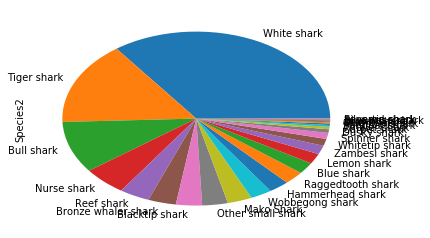

In [10]:
species_filt.Species2.value_counts().plot.pie()

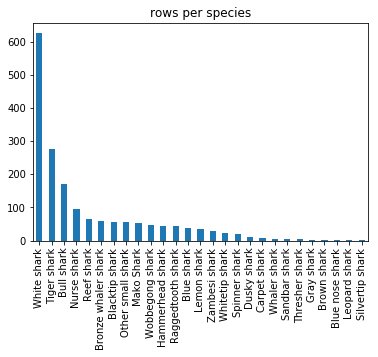

In [11]:
# All species represented
only_sharks = df.Species2[~df.Species2.isin(['INVALID ENTRY',
                               'OTHER / NOT KNOWN',
                               'HOAX',
                              'DROWNED',
                              'STINGRAY'])]
only_sharks.value_counts().plot.bar(title='rows per species')

In [12]:
only_sharks.head()

0    White shark
4    Tiger shark
6    Tiger shark
7    Lemon shark
8     Bull shark
Name: Species2, dtype: object

## 🦈️ Shark Species - The Most Documented

In [13]:
top_sharks = []
for e in list(species_filt.Species2.value_counts().head(5).items()):
    top_sharks.append(e[0])
top_sharks

[u'White shark', u'Tiger shark', u'Bull shark', u'Nurse shark', u'Reef shark']

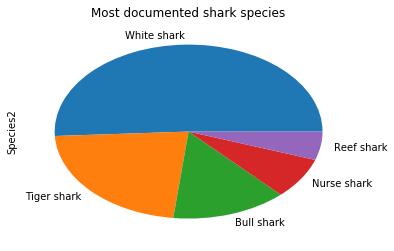

In [14]:
# Top sharks represented and filtered
species_filt.Species2[df.Species2.isin(top_sharks)].value_counts().plot.pie(
    title='Most documented shark species')

## 🎣️ Step 8 - Hypothesis verification

## Do the 5 species with the most registered attacks have a higher *fatalities/survivals ratio* when these attacks are 'PROVOKED' by the victims?

In [15]:

# Here, I create a new copy of the dataframe which will be later masked to show
# only relevant data - 🔥️ Can return an encoding error when representing the df

df = df.reset_index()
DF = df[~df['Fatal'].isin(['UNKNOWN']) # filter Fatalities
  ][df['Species2'].isin(top_sharks)    # include only the most registered sharks
    ][df['Type'].isin(['Provoked', 'Unprovoked']) # only provoked or unprovoked attacks
     ][['Species2', 'Fatal', 'Type']]  # bring back only the 3 columns related to the hypothesis

DF.head(10)

/home/rh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/rh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Species2,Fatal,Type
4,Tiger shark,N,Provoked
6,Tiger shark,Y,Unprovoked
8,Bull shark,N,Unprovoked
10,Reef shark,N,Provoked
14,Nurse shark,N,Provoked
18,Tiger shark,N,Unprovoked
22,White shark,N,Unprovoked
23,Tiger shark,N,Unprovoked
24,White shark,N,Unprovoked
26,Bull shark,N,Unprovoked


In [16]:
# Group the new df by ammount of rows with complete data
DF.groupby(['Species2', 'Type']).agg({'Fatal':'count'})

Fatal
Species2    Type             
Bull shark  Provoked        7
            Unprovoked    160
Nurse shark Provoked       56
            Unprovoked     35
Reef shark  Provoked        9
            Unprovoked     55
Tiger shark Provoked       23
            Unprovoked    226
White shark Provoked       26
            Unprovoked    472

### 🦈️ Create a new column that turns `Fatalities` into `booleans`.
### - `x: True if 'Y' else False`

In [17]:
DF['Victim_died'] = np.where(DF.Fatal.isin(['Y']), True, False)
DF['Victim_survived'] = np.where(DF.Fatal.isin(['N']), True, False)

DF.head()

,Species2,Fatal,Type,Victim_died,Victim_survived
4,Tiger shark,N,Provoked,False,True
6,Tiger shark,Y,Unprovoked,True,False
8,Bull shark,N,Unprovoked,False,True
10,Reef shark,N,Provoked,False,True
14,Nurse shark,N,Provoked,False,True


In [18]:
# Count deaths per each possible scenario
Hypothesis = DF.groupby(['Species2', 'Type']).agg({'Victim_died':'sum'})
Hypothesis

Victim_died
Species2    Type                   
Bull shark  Provoked            0.0
            Unprovoked         35.0
Nurse shark Provoked            0.0
            Unprovoked          0.0
Reef shark  Provoked            0.0
            Unprovoked          0.0
Tiger shark Provoked            0.0
            Unprovoked         62.0
White shark Provoked            0.0
            Unprovoked        137.0

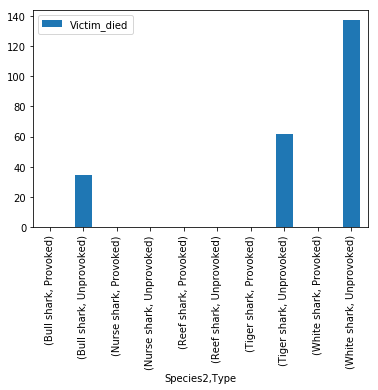

In [19]:
Hypothesis.plot.bar()

<br><br>
# 🏊️ Apparently, there is not a single case of a `Provoked` attack to a `top killer` that resulted in a documented `Fatal` incident
### This did not seem like an intuitive answer, so I decided to dig a bit deeper into the available data.
<br><br>

![shark species](INPUT/species.jpg)

<center> <h1> 🦈️ Nurse Shark

![Nurse Sharks](INPUT/nurse-shark-swimming.jpg)
![Nurse Sharks](INPUT/nurse-shark.jpg)

## 🦈️ Fatality of nurse shark attacks 

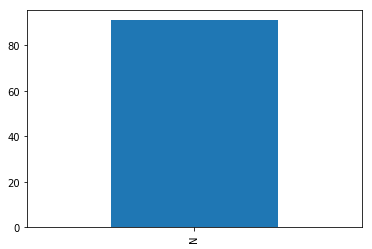

In [20]:
# White shark attacks, provoked vs not provoked
DF.Fatal[df.Species2.isin(['Nurse shark'])].value_counts().plot.bar()

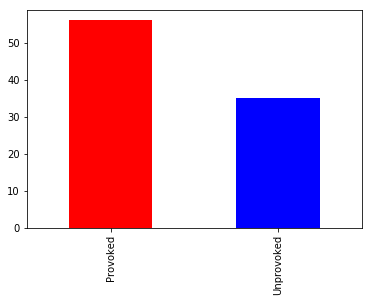

In [21]:
DF.Type[df.Species2.isin(['Nurse shark'])].value_counts().plot.bar(color=('red','blue'))

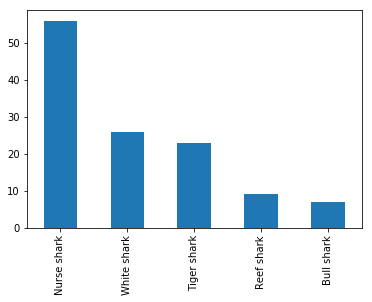

In [22]:
# Provoked attacks by species
DF.Species2[df.Type.isin(['Provoked'])].value_counts().plot.bar()

<center> <h1> 🦈️ Reef Shark

![White Shark Fatality](INPUT/reef-shark.jpg)

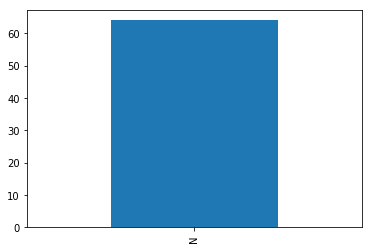

In [23]:
# White shark attacks, provoked vs not provoked
DF.Fatal[df.Species2.isin(['Reef shark'])].value_counts().plot.bar()

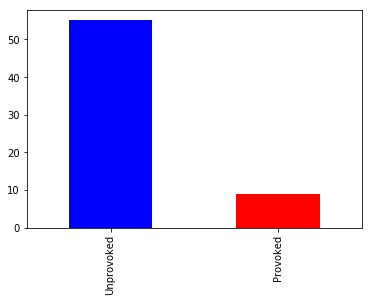

In [24]:
# White shark attacks, provoked vs not provoked
DF.Type[df.Species2.isin(['Reef shark'])].value_counts().plot.bar(color=('blue', 'red'))

<center> <h1> 🦈️ Tiger Shark

![White Shark Fatality](INPUT/tiger-shark.jpg)

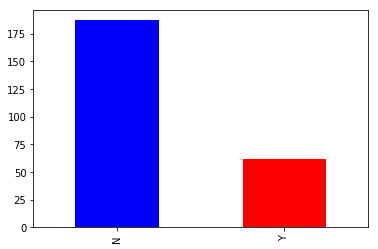

In [25]:
# White shark attacks, provoked vs not provoked
DF.Fatal[df.Species2.isin(['Tiger shark'])].value_counts().plot.bar(color=('blue', 'red'))

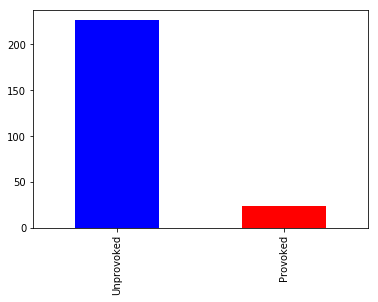

In [26]:
# White shark attacks, provoked vs not provoked
DF.Type[df.Species2.isin(['Tiger shark'])].value_counts().plot.bar(color=('blue', 'red'))

<center> <h1> 🦈️ Bull Shark

![White Shark Fatality](INPUT/bull-shark.jpg)

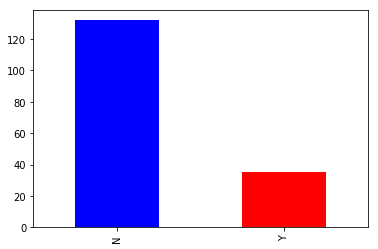

In [27]:
# White shark attacks, provoked vs not provoked
DF.Fatal[df.Species2.isin(['Bull shark'])].value_counts().plot.bar(color=('blue', 'red'))

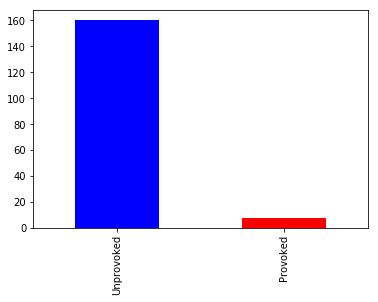

In [28]:
# White shark attacks, provoked vs not provoked
DF.Type[df.Species2.isin(['Bull shark'])].value_counts().plot.bar(color=('blue', 'red'))

<center> <h1> 🦈️ White Shark

![White Shark Fatality](INPUT/white-shark.jpg)

## 🦈️ Fatalities - White shark

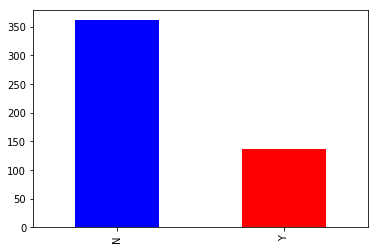

In [29]:
DF.Fatal[df.Species2.isin(['White shark'])].value_counts().plot.bar(color=('blue', 'red'))

## 🦈️ Type of attacks - White shark

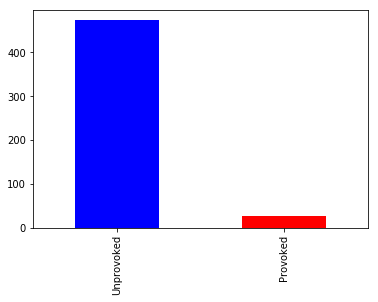

In [30]:
# White shark attacks, provoked vs not provoked
DF.Type[df.Species2.isin(['White shark'])].value_counts().plot.bar(color=('blue', 'red'))

# 🌊️ Conclusion: Fatality/Survival ratio

In [31]:
# All species represented
only_sharks = df[~df.Species2.isin(['INVALID ENTRY',
                               'OTHER / NOT KNOWN',
                               'HOAX',
                              'DROWNED',
                              'STINGRAY'])]

In [32]:
only_sharks.head()

,index,CaseNum,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal,Species,Source,href,Species2,Activity2
0,0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,White shark,Paddling
4,4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",A .Kipper,http://sharkattackfile.net/spreadsheets/pdf_di...,Tiger shark,Diving
6,6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,FATAL,Y,Tiger shark,"Diario de Pernambuco, 6/4/2018",http://sharkattackfile.net/spreadsheets/pdf_di...,Tiger shark,Swimming
7,7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,Minor injury to foot. PROVOKED INCIDENT,N,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,Lemon shark,Fishing
8,8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,Lower left leg bitten,N,"Bull shark, 6'","K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,Bull shark,Walking


In [33]:
# 🌊️ All species represented 
only_sharks['Victim_died'] = np.where(only_sharks.Fatal.isin(['Y']), 1, 0)
only_sharks['Victim_survived'] = np.where(only_sharks.Fatal.isin(['N']), 1, 0)
#only_sharks['Fatality_ratio'] = only_sharks['Victim_died'] / only_sharks['Victim_survived']
DFH = only_sharks.groupby(['Type']).agg({'Victim_died':'sum', 'Victim_survived':'sum'})
DFH['Fatality_ratio'] = DFH['Victim_died'] / DFH['Victim_survived']
DFH

/home/rh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/rh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Victim_survived,Victim_died,Fatality_ratio
Type,,,
Boat,159,3,0.018868
Invalid,2,1,0.500000
Provoked,239,1,0.004184
Sea Disaster,8,11,1.375000
Unprovoked,1069,262,0.245089


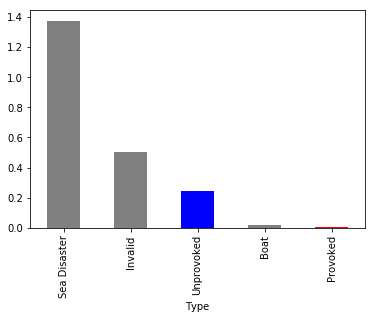

In [34]:
DFH.Fatality_ratio.sort_values(ascending=False).plot.bar(color=('grey', 'grey', 'blue', 'grey', 'red'))

![Shark attacks, a project by Roberto Henríquez Perozo. Data Analytics Bootcamp at IronHack](INPUT/shark-attacks.png)


<center> <h1>  Happy swimming <br> <br> 🦈️ <br><br><br>